In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the CSV file into a DataFrame
data_df = pd.read_csv('NYC_DATA_INPUT.csv')

# Check the shape of the dataFrame
data_df.shape

(9781, 32)

In [5]:
data_df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,INTERESTED,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,ESCHOOL,HSCHOOL,BUS_COUNTS,FnB_COUNTS
0,MLS Listing,NaN,Multi-Family (2-4 Unit),28 Paerdegat 9th St,Brooklyn,NY,11236.0,999000.0,6.0,3.0,...,Y,40.629509,-73.905842,745.439590,3802.343826,2554.082124,18.0,18.0,1.0,0.0
1,MLS Listing,NaN,Multi-Family (2-4 Unit),1326 E 85th St,Canarsie,NY,11236.0,780000.0,3.0,2.5,...,Y,40.630677,-73.902075,560.007047,3741.402496,2343.906613,18.0,18.0,1.0,0.0
2,MLS Listing,NaN,Multi-Family (2-4 Unit),290 Conklin Ave,Canarsie,NY,11236.0,1300000.0,9.0,7.0,...,Y,40.645421,-73.899124,1289.010055,2035.028063,353.256792,18.0,18.0,5.0,2.0
3,MLS Listing,NaN,Multi-Family (2-4 Unit),8708 Avenue N,Canarsie,NY,11236.0,1199999.0,9.0,4.5,...,Y,40.630598,-73.898676,305.695358,3885.214277,2381.676680,18.0,18.0,1.0,0.0
4,MLS Listing,NaN,Multi-Family (2-4 Unit),1429 E 86th St,Brooklyn,NY,11236.0,985000.0,5.0,3.5,...,Y,40.629736,-73.898954,229.367213,3990.065773,2502.626837,18.0,18.0,1.0,0.0


In [6]:
# Check out null values
null_sum = data_df.isnull().sum()
null_sum

SALE TYPE                                                                                         0
SOLD DATE                                                                                      9781
PROPERTY TYPE                                                                                     0
ADDRESS                                                                                          35
CITY                                                                                             12
STATE OR PROVINCE                                                                                 0
ZIP OR POSTAL CODE                                                                                0
PRICE                                                                                             0
BEDS                                                                                              0
BATHS                                                                                             0


In [7]:
data_df.drop(columns=data_df.columns[null_sum > 0.5 * len(data_df)], inplace=True)

In [8]:
data_df['LOT SIZE'].fillna(0, inplace=True)

In [9]:
# Check out null values
null_sum = data_df.isnull().sum()
null_sum

SALE TYPE                                                                                        0
PROPERTY TYPE                                                                                    0
ADDRESS                                                                                         35
CITY                                                                                            12
STATE OR PROVINCE                                                                                0
ZIP OR POSTAL CODE                                                                               0
PRICE                                                                                            0
BEDS                                                                                             0
BATHS                                                                                            0
LOCATION                                                                                        59
SQUARE FEE

In [10]:
data_df.dropna(inplace=True)

In [11]:
data_df.shape, data_df.columns

((9521, 31),
 Index(['SALE TYPE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE',
        'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION',
        'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
        '$/SQUARE FEET', 'HOA/MONTH', 'STATUS',
        'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
        'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE',
        'PARK_DIST', 'HOSPITAL_D', 'RAIL_DIST', 'ESCHOOL', 'HSCHOOL',
        'BUS_COUNTS', 'FnB_COUNTS'],
       dtype='object'))

In [12]:
data_df.dtypes

SALE TYPE                                                                                       object
PROPERTY TYPE                                                                                   object
ADDRESS                                                                                         object
CITY                                                                                            object
STATE OR PROVINCE                                                                               object
ZIP OR POSTAL CODE                                                                             float64
PRICE                                                                                          float64
BEDS                                                                                           float64
BATHS                                                                                          float64
LOCATION                                                                 

In [13]:
cat_col = ['SALE TYPE', 'PROPERTY TYPE', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOCATION', 'STATUS', 'SOURCE','FAVORITE','INTERESTED','ESCHOOL','HSCHOOL']
data_df[cat_col] = data_df[cat_col].astype('category')
data_df[cat_col]

,SALE TYPE,PROPERTY TYPE,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,LOCATION,STATUS,SOURCE,FAVORITE,INTERESTED,ESCHOOL,HSCHOOL
0,MLS Listing,Multi-Family (2-4 Unit),Brooklyn,NY,11236.0,Brooklyn,Active,BNYMLS,N,Y,18.0,18.0
1,MLS Listing,Multi-Family (2-4 Unit),Canarsie,NY,11236.0,Canarsie,Active,OneKey® MLS as Distributed by MLS Grid,N,Y,18.0,18.0
2,MLS Listing,Multi-Family (2-4 Unit),Canarsie,NY,11236.0,Canarsie,Active,OneKey® MLS as Distributed by MLS Grid,N,Y,18.0,18.0
3,MLS Listing,Multi-Family (2-4 Unit),Canarsie,NY,11236.0,Canarsie,Active,OneKey® MLS as Distributed by MLS Grid,N,Y,18.0,18.0
4,MLS Listing,Multi-Family (2-4 Unit),Brooklyn,NY,11236.0,Brooklyn,Active,BNYMLS,N,Y,18.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9577,MLS Listing,Single Family Residential,Jamaica,NY,11436.0,Jamaica,Active,OneKey® MLS as Distributed by MLS Grid,N,Y,27.0,27.0
9578,MLS Listing,Single Family Residential,Jamaica,NY,11436.0,Jamaica,Active,OneKey® MLS as Distributed by MLS Grid,N,Y,27.0,27.0
9579,MLS Listing,Single Family Residential,Jamaica,NY,11436.0,Jamaica,Active,OneKey® MLS as Distributed by MLS Grid,N,Y,27.0,27.0
9580,MLS Listing,Single Family Residential,Bronx,NY,10463.0,BRONX,Active,OneKey® MLS as Distributed by MLS Grid,N,Y,10.0,10.0


In [14]:
# the following columns now all have the categorical data types
data_df[cat_col].dtypes

SALE TYPE             category
PROPERTY TYPE         category
CITY                  category
STATE OR PROVINCE     category
ZIP OR POSTAL CODE    category
LOCATION              category
STATUS                category
SOURCE                category
FAVORITE              category
INTERESTED            category
ESCHOOL               category
HSCHOOL               category
dtype: object

In [15]:
# count the #samples fall into each category
data_df['CITY'].value_counts() 

Brooklyn                1786
Bronx                   1029
Staten Island            907
Flushing                 865
New York                 394
                        ... 
Prospect Heights           1
Queens Village North       1
Richmond                   1
Richmond Hill N.           1
Yonkers                    1
Name: CITY, Length: 147, dtype: int64

In [16]:
# double check the remaining categories 
data_df['CITY'].astype('string').value_counts()

Brooklyn            1786
Bronx               1029
Staten Island        907
Flushing             865
New York             394
                    ... 
Richmond Hill N.       1
Rockaway               1
Seaside                1
Woodridge              1
Jamaica South          1
Name: CITY, Length: 147, dtype: Int64

In [17]:
# check the data of PROPERTY TYPE
data_df['PROPERTY TYPE'].value_counts() 

Condo/Co-op                  4123
Multi-Family (2-4 Unit)      2351
Single Family Residential    2192
Townhouse                     323
Vacant Land                   296
Multi-Family (5+ Unit)        234
Unknown                         2
Name: PROPERTY TYPE, dtype: int64

In [18]:
# Merge two seperate multi-family categories into one single category
data_df['PROPERTY TYPE'].replace(['Multi-Family (5+ Unit)', 'Multi-Family (2-4 Unit)'],'Multi-Family', inplace=True)

In [19]:
data_df['PROPERTY TYPE'].value_counts() 

Condo/Co-op                  4123
Multi-Family                 2585
Single Family Residential    2192
Townhouse                     323
Vacant Land                   296
Unknown                         2
Name: PROPERTY TYPE, dtype: int64

In [20]:
# Rename features:
data_df = data_df.rename(columns={'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)': 'URL',
                                   'STATE OR PROVINCE': 'STATE',
                                   'ZIP OR POSTAL CODE': 'ZIP',
                                   'SQUARE FEET': 'SQFT',
                                   'PROPERTY TYPE': 'PROP_TYPE',
                                   'LOT SIZE': 'LOT',
                                   'YEAR BUILT': 'YR_BUILT',
                                   '$/SQUARE FEET': 'PRICE_SQFT',
                                   })

In [21]:
data_df.head()

,SALE TYPE,PROP_TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,LOCATION,...,INTERESTED,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,ESCHOOL,HSCHOOL,BUS_COUNTS,FnB_COUNTS
0,MLS Listing,Multi-Family,28 Paerdegat 9th St,Brooklyn,NY,11236.0,999000.0,6.0,3.0,Brooklyn,...,Y,40.629509,-73.905842,745.439590,3802.343826,2554.082124,18.0,18.0,1.0,0.0
1,MLS Listing,Multi-Family,1326 E 85th St,Canarsie,NY,11236.0,780000.0,3.0,2.5,Canarsie,...,Y,40.630677,-73.902075,560.007047,3741.402496,2343.906613,18.0,18.0,1.0,0.0
2,MLS Listing,Multi-Family,290 Conklin Ave,Canarsie,NY,11236.0,1300000.0,9.0,7.0,Canarsie,...,Y,40.645421,-73.899124,1289.010055,2035.028063,353.256792,18.0,18.0,5.0,2.0
3,MLS Listing,Multi-Family,8708 Avenue N,Canarsie,NY,11236.0,1199999.0,9.0,4.5,Canarsie,...,Y,40.630598,-73.898676,305.695358,3885.214277,2381.676680,18.0,18.0,1.0,0.0
4,MLS Listing,Multi-Family,1429 E 86th St,Brooklyn,NY,11236.0,985000.0,5.0,3.5,Brooklyn,...,Y,40.629736,-73.898954,229.367213,3990.065773,2502.626837,18.0,18.0,1.0,0.0


In [22]:
null_sum = data_df.isnull().sum()
null_sum

SALE TYPE         0
PROP_TYPE         0
ADDRESS           0
CITY              0
STATE             0
ZIP               0
PRICE             0
BEDS              0
BATHS             0
LOCATION          0
SQFT              0
LOT               0
YR_BUILT          0
DAYS ON MARKET    0
PRICE_SQFT        0
HOA/MONTH         0
STATUS            0
URL               0
SOURCE            0
MLS#              0
FAVORITE          0
INTERESTED        0
LATITUDE          0
LONGITUDE         0
PARK_DIST         0
HOSPITAL_D        0
RAIL_DIST         0
ESCHOOL           0
HSCHOOL           0
BUS_COUNTS        0
FnB_COUNTS        0
dtype: int64

In [23]:
data_df.dtypes

SALE TYPE         category
PROP_TYPE         category
ADDRESS             object
CITY              category
STATE             category
ZIP               category
PRICE              float64
BEDS               float64
BATHS              float64
LOCATION          category
SQFT               float64
LOT                float64
YR_BUILT           float64
DAYS ON MARKET     float64
PRICE_SQFT         float64
HOA/MONTH          float64
STATUS            category
URL                 object
SOURCE            category
MLS#                object
FAVORITE          category
INTERESTED        category
LATITUDE           float64
LONGITUDE          float64
PARK_DIST          float64
HOSPITAL_D         float64
RAIL_DIST          float64
ESCHOOL           category
HSCHOOL           category
BUS_COUNTS         float64
FnB_COUNTS         float64
dtype: object

In [24]:
pd.set_option('display.max_columns', None)
data_df[data_df['SQFT'].isnull()]

#data_df.iloc[30]['URL']

,SALE TYPE,PROP_TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,LOCATION,SQFT,LOT,YR_BUILT,DAYS ON MARKET,PRICE_SQFT,HOA/MONTH,STATUS,URL,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,ESCHOOL,HSCHOOL,BUS_COUNTS,FnB_COUNTS


In [25]:
data_df['PROP_TYPE'].value_counts() 

Condo/Co-op                  4123
Multi-Family                 2585
Single Family Residential    2192
Townhouse                     323
Vacant Land                   296
Unknown                         2
Name: PROP_TYPE, dtype: int64

In [26]:
data_df.drop(data_df[data_df['PROP_TYPE'] == 'Vacant Land'].index, inplace=True)

In [27]:
average_sqft = data_df[data_df['SQFT'] != 0]['SQFT'].mean()

data_df.loc[data_df['SQFT'] == 0, 'SQFT'] = average_sqft

average_yr = data_df[data_df['YR_BUILT'] != 0]['YR_BUILT'].mean()

data_df.loc[data_df['YR_BUILT'] == 0, 'YR_BUILT'] = average_yr

In [28]:
data_df

,SALE TYPE,PROP_TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,LOCATION,SQFT,LOT,YR_BUILT,DAYS ON MARKET,PRICE_SQFT,HOA/MONTH,STATUS,URL,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,ESCHOOL,HSCHOOL,BUS_COUNTS,FnB_COUNTS
0,MLS Listing,Multi-Family,28 Paerdegat 9th St,Brooklyn,NY,11236.0,999000.0,6.0,3.0,Brooklyn,1820.903505,2000.0,1965.0,235.0,0.0,0.0,Active,https://www.redfin.com/NY/Brooklyn/28-Paerdega...,BNYMLS,475108,N,Y,40.629509,-73.905842,745.439590,3802.343826,2554.082124,18.0,18.0,1.0,0.0
1,MLS Listing,Multi-Family,1326 E 85th St,Canarsie,NY,11236.0,780000.0,3.0,2.5,Canarsie,1820.903505,2000.0,1955.0,157.0,0.0,0.0,Active,https://www.redfin.com/NY/Brooklyn/1326-E-85th...,OneKey® MLS as Distributed by MLS Grid,3504398,N,Y,40.630677,-73.902075,560.007047,3741.402496,2343.906613,18.0,18.0,1.0,0.0
2,MLS Listing,Multi-Family,290 Conklin Ave,Canarsie,NY,11236.0,1300000.0,9.0,7.0,Canarsie,1820.903505,3750.0,2006.0,4.0,0.0,0.0,Active,https://www.redfin.com/NY/Brooklyn/290-Conklin...,OneKey® MLS as Distributed by MLS Grid,3532070,N,Y,40.645421,-73.899124,1289.010055,2035.028063,353.256792,18.0,18.0,5.0,2.0
3,MLS Listing,Multi-Family,8708 Avenue N,Canarsie,NY,11236.0,1199999.0,9.0,4.5,Canarsie,2760.000000,1960.0,1960.0,5.0,435.0,0.0,Active,https://www.redfin.com/NY/Brooklyn/8708-Avenue...,OneKey® MLS as Distributed by MLS Grid,3531522,N,Y,40.630598,-73.898676,305.695358,3885.214277,2381.676680,18.0,18.0,1.0,0.0
4,MLS Listing,Multi-Family,1429 E 86th St,Brooklyn,NY,11236.0,985000.0,5.0,3.5,Brooklyn,2400.000000,2000.0,1960.0,536.0,410.0,0.0,Active,https://www.redfin.com/NY/Brooklyn/1429-E-86th...,BNYMLS,466364,N,Y,40.629736,-73.898954,229.367213,3990.065773,2502.626837,18.0,18.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,MLS Listing,Single Family Residential,133-14 146th St,Jamaica,NY,11436.0,569900.0,3.0,1.0,Jamaica,1068.000000,2450.0,1925.0,258.0,534.0,0.0,Active,https://www.redfin.com/NY/Jamaica/13314-146th-...,OneKey® MLS as Distributed by MLS Grid,3482889,N,Y,40.668333,-73.793036,437.828889,5502.144154,4305.573003,27.0,27.0,7.0,2.0
9578,MLS Listing,Single Family Residential,12335 Inwood St,Jamaica,NY,11436.0,575000.0,3.0,2.0,Jamaica,1441.000000,1599.0,1935.0,25.0,399.0,0.0,Active,https://www.redfin.com/NY/Jamaica/12335-Inwood...,OneKey® MLS as Distributed by MLS Grid,H6286261,N,Y,40.674317,-73.792667,346.568673,4767.899327,4064.347531,27.0,27.0,8.0,4.0
9579,MLS Listing,Single Family Residential,128-40 146th St,Jamaica,NY,11436.0,600000.0,2.0,1.5,Jamaica,1820.903505,1968.0,1920.0,213.0,0.0,0.0,Active,https://www.redfin.com/NY/Jamaica/12840-146th-...,OneKey® MLS as Distributed by MLS Grid,3492467,N,Y,40.670722,-73.792519,438.582532,5224.426759,4326.798096,27.0,27.0,7.0,4.0
9580,MLS Listing,Single Family Residential,156 West 228 St,Bronx,NY,10463.0,859000.0,7.0,4.0,BRONX,1820.903505,3000.0,1901.0,27.0,0.0,0.0,Active,https://www.redfin.com/NY/Bronx/156-W-228th-St...,OneKey® MLS as Distributed by MLS Grid,3526977,N,Y,40.877265,-73.909644,778.277604,690.789296,398.663577,10.0,10.0,15.0,3.0


In [29]:
data_df = data_df.reset_index()

In [30]:
len(data_df)

9225

In [31]:
data_df['PRICE_SQFT'] = data_df['PRICE'] / data_df['SQFT']

In [32]:
num_col = ['PRICE', 'BEDS', 'BATHS', 'SQFT', 'YR_BUILT', 'PRICE_SQFT', 'HOA/MONTH', 'PARK_DIST', 'HOSPITAL_D', 'RAIL_DIST', 'BUS_COUNTS', 'FnB_COUNTS', 'LOT']

In [33]:
data_df[num_col].describe()

,PRICE,BEDS,BATHS,SQFT,YR_BUILT,PRICE_SQFT,HOA/MONTH,PARK_DIST,HOSPITAL_D,RAIL_DIST,BUS_COUNTS,FnB_COUNTS,LOT
count,9.225000e+03,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000
mean,1.003896e+06,3.449214,2.348293,1820.903505,1957.223291,648.975166,322.400650,1048.448590,2820.228142,1826.979479,9.412033,35.346450,4674.518049
std,1.032370e+06,3.315946,2.470301,1582.169458,39.906939,3137.790998,600.888546,747.593514,1971.524723,2136.769992,6.964730,62.909755,24908.277764
min,1.500000e+03,0.000000,0.000000,2.000000,1050.000000,6.756757,0.000000,0.000000,77.246754,14.407025,0.000000,0.000000,0.000000
25%,4.600000e+05,2.000000,1.000000,1022.000000,1930.000000,351.105332,0.000000,467.512331,1334.815846,494.616030,4.000000,4.000000,0.000000
50%,7.530000e+05,3.000000,2.000000,1820.903505,1955.000000,488.088321,0.000000,930.259678,2261.751221,924.071100,8.000000,13.000000,1800.000000
75%,1.200000e+06,4.000000,3.000000,1820.903505,1979.000000,704.986150,575.000000,1474.342565,3863.442502,2174.321731,13.000000,42.000000,2949.000000
max,1.900000e+07,84.000000,85.000000,36930.000000,2957.000000,221666.666667,11473.000000,4955.299870,11862.670453,10758.879837,44.000000,661.000000,484555.000000


<Axes: xlabel='YR_BUILT'>

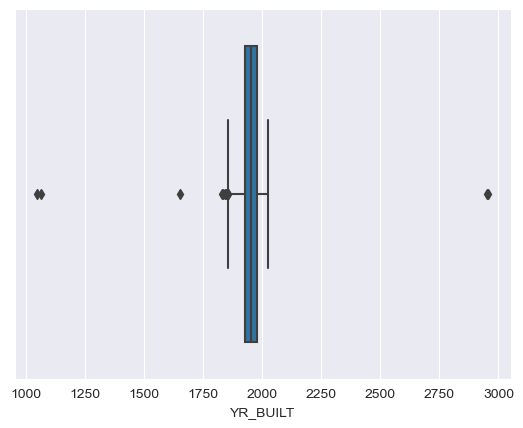

In [34]:
# draw box plot to check outliers
attr = 'YR_BUILT'
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df[attr], orient='h')

In [35]:
Q1 = data_df[attr].quantile(0.25)
Q3 = data_df[attr].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
print(Q1, Q3, lower_thresh, upper_thresh)

1930.0 1979.0 1856.5 2052.5


In [36]:
import copy
data_check = copy.deepcopy(data_df)

data_check



,index,SALE TYPE,PROP_TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,LOCATION,SQFT,LOT,YR_BUILT,DAYS ON MARKET,PRICE_SQFT,HOA/MONTH,STATUS,URL,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,ESCHOOL,HSCHOOL,BUS_COUNTS,FnB_COUNTS
0,0,MLS Listing,Multi-Family,28 Paerdegat 9th St,Brooklyn,NY,11236.0,999000.0,6.0,3.0,Brooklyn,1820.903505,2000.0,1965.0,235.0,548.628743,0.0,Active,https://www.redfin.com/NY/Brooklyn/28-Paerdega...,BNYMLS,475108,N,Y,40.629509,-73.905842,745.439590,3802.343826,2554.082124,18.0,18.0,1.0,0.0
1,1,MLS Listing,Multi-Family,1326 E 85th St,Canarsie,NY,11236.0,780000.0,3.0,2.5,Canarsie,1820.903505,2000.0,1955.0,157.0,428.358778,0.0,Active,https://www.redfin.com/NY/Brooklyn/1326-E-85th...,OneKey® MLS as Distributed by MLS Grid,3504398,N,Y,40.630677,-73.902075,560.007047,3741.402496,2343.906613,18.0,18.0,1.0,0.0
2,2,MLS Listing,Multi-Family,290 Conklin Ave,Canarsie,NY,11236.0,1300000.0,9.0,7.0,Canarsie,1820.903505,3750.0,2006.0,4.0,713.931297,0.0,Active,https://www.redfin.com/NY/Brooklyn/290-Conklin...,OneKey® MLS as Distributed by MLS Grid,3532070,N,Y,40.645421,-73.899124,1289.010055,2035.028063,353.256792,18.0,18.0,5.0,2.0
3,3,MLS Listing,Multi-Family,8708 Avenue N,Canarsie,NY,11236.0,1199999.0,9.0,4.5,Canarsie,2760.000000,1960.0,1960.0,5.0,434.782246,0.0,Active,https://www.redfin.com/NY/Brooklyn/8708-Avenue...,OneKey® MLS as Distributed by MLS Grid,3531522,N,Y,40.630598,-73.898676,305.695358,3885.214277,2381.676680,18.0,18.0,1.0,0.0
4,4,MLS Listing,Multi-Family,1429 E 86th St,Brooklyn,NY,11236.0,985000.0,5.0,3.5,Brooklyn,2400.000000,2000.0,1960.0,536.0,410.416667,0.0,Active,https://www.redfin.com/NY/Brooklyn/1429-E-86th...,BNYMLS,466364,N,Y,40.629736,-73.898954,229.367213,3990.065773,2502.626837,18.0,18.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9220,9577,MLS Listing,Single Family Residential,133-14 146th St,Jamaica,NY,11436.0,569900.0,3.0,1.0,Jamaica,1068.000000,2450.0,1925.0,258.0,533.614232,0.0,Active,https://www.redfin.com/NY/Jamaica/13314-146th-...,OneKey® MLS as Distributed by MLS Grid,3482889,N,Y,40.668333,-73.793036,437.828889,5502.144154,4305.573003,27.0,27.0,7.0,2.0
9221,9578,MLS Listing,Single Family Residential,12335 Inwood St,Jamaica,NY,11436.0,575000.0,3.0,2.0,Jamaica,1441.000000,1599.0,1935.0,25.0,399.028452,0.0,Active,https://www.redfin.com/NY/Jamaica/12335-Inwood...,OneKey® MLS as Distributed by MLS Grid,H6286261,N,Y,40.674317,-73.792667,346.568673,4767.899327,4064.347531,27.0,27.0,8.0,4.0
9222,9579,MLS Listing,Single Family Residential,128-40 146th St,Jamaica,NY,11436.0,600000.0,2.0,1.5,Jamaica,1820.903505,1968.0,1920.0,213.0,329.506752,0.0,Active,https://www.redfin.com/NY/Jamaica/12840-146th-...,OneKey® MLS as Distributed by MLS Grid,3492467,N,Y,40.670722,-73.792519,438.582532,5224.426759,4326.798096,27.0,27.0,7.0,4.0
9223,9580,MLS Listing,Single Family Residential,156 West 228 St,Bronx,NY,10463.0,859000.0,7.0,4.0,BRONX,1820.903505,3000.0,1901.0,27.0,471.743834,0.0,Active,https://www.redfin.com/NY/Bronx/156-W-228th-St...,OneKey® MLS as Distributed by MLS Grid,3526977,N,Y,40.877265,-73.909644,778.277604,690.789296,398.663577,10.0,10.0,15.0,3.0


In [37]:
for attr in num_col:
    Q1 = data_check[attr].quantile(0.25)
    Q3 = data_check[attr].quantile(0.75)
    IQR = Q3 - Q1
    lower_thresh = Q1 - 1.5 * IQR
    upper_thresh = Q3 + 1.5 * IQR
    print(attr, Q1, Q3, lower_thresh, upper_thresh)

    # Use | for logical OR and additional parentheses for proper order of operations
    data_check.drop(data_check[(data_check[attr] > upper_thresh) | (data_check[attr] < lower_thresh)].index, inplace=True)

# Print the length of the filtered DataFrame
print(len(data_check))


PRICE 460000.0 1200000.0 -650000.0 2310000.0
BEDS 1.0 4.0 -3.5 8.5
BATHS 1.0 2.5 -1.25 4.75
SQFT 953.0 1820.9035045607297 -348.8552568410946 3122.7587614018244
YR_BUILT 1930.0 1975.0 1862.5 2042.5
PRICE_SQFT 340.0 672.2783389450057 -158.4175084175085 1170.695847362514
HOA/MONTH 0.0 700.0 -1050.0 1750.0
PARK_DIST 471.7005690993535 1505.112320899495 -1078.4170586008588 3055.2299485997073
HOSPITAL_D 1357.9120288813976 4003.5715291772904 -2610.577221562442 7972.06077962113
RAIL_DIST 519.5570633888337 2183.442698677405 -1976.2713895440234 4679.271151610263
BUS_COUNTS 5.0 13.0 -7.0 25.0
FnB_COUNTS 5.0 39.0 -46.0 90.0
LOT 0.0 2500.0 -3750.0 6250.0
5445


In [38]:
selected = ['PROP_TYPE', 'ADDRESS', 'CITY', 'ZIP', 'PRICE', 'LOCATION', 'SQFT', 'YR_BUILT', 'MLS#', 'LATITUDE', 'LONGITUDE', 'PARK_DIST', 'HOSPITAL_D', 'RAIL_DIST', 'BUS_COUNTS', 'FnB_COUNTS']

selected_df = data_check[selected]

# Export df to csv:

selected_df.to_csv('NYC_DATA_OUTPUT.csv')